Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [43]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
BIKE_DF = pd.read_csv("../data/Quebec_BikeCity.csv")
FS_DF = pd.read_csv("../data/FOURSQUARE_DF.csv")
YELP_DF = pd.read_csv("../data/YELP_DF.csv")

#two inner joins to combine all the datasets
BIKE_FS_DF = pd.merge(BIKE_DF, FS_DF, how='inner', on= ['Latitude', 'Longitude'])
BIKE_FS_YELP_DF = pd.merge(BIKE_FS_DF, YELP_DF, how ='inner', on= ['Latitude', 'Longitude'])

#rename rating colums
BIKE_FS_YELP_DF.rename(columns={'Rest/Bar Rating' : 'Rest/Bar Rating(FS)','REST/BAR RATING' : 'Rest/Bar Rating(YELP)'}, inplace=True)
BIKE_FS_YELP_DF

,Name,Latitude,Longitude,Number of Free Bikes,Rest/Bar Rating(FS),Average Distance_Bar_x,Average Distance_Gym_x,Rest/Bar Rating(YELP),Average Distance_Bar_y,Average Distance_Gym_y
0,Parc Anet-Gomin,46.786588,-71.258231,5,0 8.1\n1 NaN\n2 8.5\n3 7.0\n4 7...,711.3,777.125000,0 4.5\n1 4.5\n2 4.5\n3 4.0\n4 ...,877.117260,0.000000
1,Sheppard / William,46.784041,-71.249391,4,0 7.8\n1 8.5\n2 6.6\n3 7.7\n4 7...,355.2,142.000000,0 4.5\n1 4.5\n2 4.5\n3 4.0\n4 ...,334.688704,0.000000
2,ExpoCité - Grand Marché,46.829433,-71.244066,4,0 8.1\n1 NaN\n2 NaN\n3 NaN\n4 6...,302.2,701.857143,0 5.0\n1 4.5\n2 5.0\n3 5.0\n4 ...,775.248808,960.440552
3,Lavigueur / Sainte-Geneviève,46.812403,-71.220411,7,0 9.1\n1 8.6\n2 8.5\n3 8.9\n4 9...,376.9,568.800000,0 4.0\n1 4.5\n2 5.0\n3 4.0\n4 ...,526.095304,596.684360
4,ExpoCité - Place Jean-Béliveau,46.826553,-71.245978,4,0 8.1\n1 9.1\n2 NaN\n3 NaN\n4 N...,395.1,608.500000,0 5.0\n1 5.0\n2 4.5\n3 4.0\n4 ...,772.152088,0.000000
...,...,...,...,...,...,...,...,...,...,...
69,Place Jacques-Cartier,46.814340,-71.224898,14,0 8.6\n1 8.5\n2 9.0\n3 8.8\n4 8...,345.0,0.000000,0 4.5\n1 4.0\n2 4.0\n3 4.5\n4 ...,395.755111,727.229924
70,Bourdages / Monseigneur-Plessis,46.816606,-71.241658,10,0 8.6\n1 7.9\n2 7.8\n3 8.6\n4 9...,663.5,688.571429,0 4.5\n1 4.5\n2 5.0\n3 4.5\n4 ...,854.998115,0.000000
71,ULaval - PEPS,46.783205,-71.276189,4,0 7.6\n1 NaN\n2 8.4\n3 8.1\n4 7...,602.4,678.500000,0 4.0\n1 5.0\n2 3.5\n3 3.5\n4 ...,663.152084,551.620940
72,Église Saint-Sauveur,46.811548,-71.235388,8,0 8.6\n1 9.2\n2 8.0\n3 8.5\n4 9...,223.1,674.300000,0 4.5\n1 4.5\n2 4.0\n3 4.5\n4 ...,502.543619,0.000000


In [71]:
#descrepancies detailed in the yelp_foursquare_EDA.ipynb notebook
BIKE_FS_YELP_DF[BIKE_FS_YELP_DF['Average Distance_Gym_x']==0]

,Name,Latitude,Longitude,Number of Free Bikes,Rest/Bar Rating(FS),Average Distance_Bar_x,Average Distance_Gym_x,Rest/Bar Rating(YELP),Average Distance_Bar_y,Average Distance_Gym_y
9,Parc Saint-Charles-Garnier,46.786087,-71.251346,7,0 7.8\n1 6.6\n2 8.5\n3 8.8\n4 7...,502.1,0.0,0 4.5\n1 4.5\n2 4.5\n3 4.5\n4 ...,573.028547,0.000000
34,Maguire / Sheppard,46.781948,-71.252610,9,0 7.0\n1 8.5\n2 6.7\n3 7.7\n4 6...,161.5,0.0,0 4.5\n1 4.5\n2 4.0\n3 4.0\n4 ...,194.417696,0.000000
39,Saint-Joseph / Saint-Anselme,46.812586,-71.229735,7,0 9.0\n1 7.9\n2 8.4\n3 8.9\n4 9...,191.4,0.0,0 4.5\n1 4.5\n2 4.0\n3 4.5\n4 ...,375.920406,0.000000
42,YMCA Saint-Roch,46.813662,-71.219204,6,0 9.0\n1 8.5\n2 8.6\n3 9.1\n4 8...,418.0,0.0,0 4.0\n1 4.0\n2 5.0\n3 4.5\n4 ...,551.057943,429.224088
43,Fraser / Cartier,46.803790,-71.225817,18,0 8.3\n1 8.6\n2 8.2\n3 8.4\n4 8...,247.4,0.0,0 4.5\n1 4.5\n2 5.0\n3 4.5\n4 ...,391.721408,0.000000
50,Père-Marquette / Des Érables,46.803584,-71.231244,23,0 9.0\n1 8.3\n2 8.6\n3 8.3\n4 8...,504.1,0.0,0 5.0\n1 4.5\n2 4.0\n3 4.5\n4 ...,732.584016,0.000000
69,Place Jacques-Cartier,46.814340,-71.224898,14,0 8.6\n1 8.5\n2 9.0\n3 8.8\n4 8...,345.0,0.0,0 4.5\n1 4.0\n2 4.0\n3 4.5\n4 ...,395.755111,727.229924


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [72]:
#new df without names, bar ratings, latitude and longitude for EDA
EDA_DF= BIKE_FS_YELP_DF[['Number of Free Bikes', 'Average Distance_Bar_x', 'Average Distance_Gym_x', 'Average Distance_Bar_y', 'Average Distance_Gym_y']]

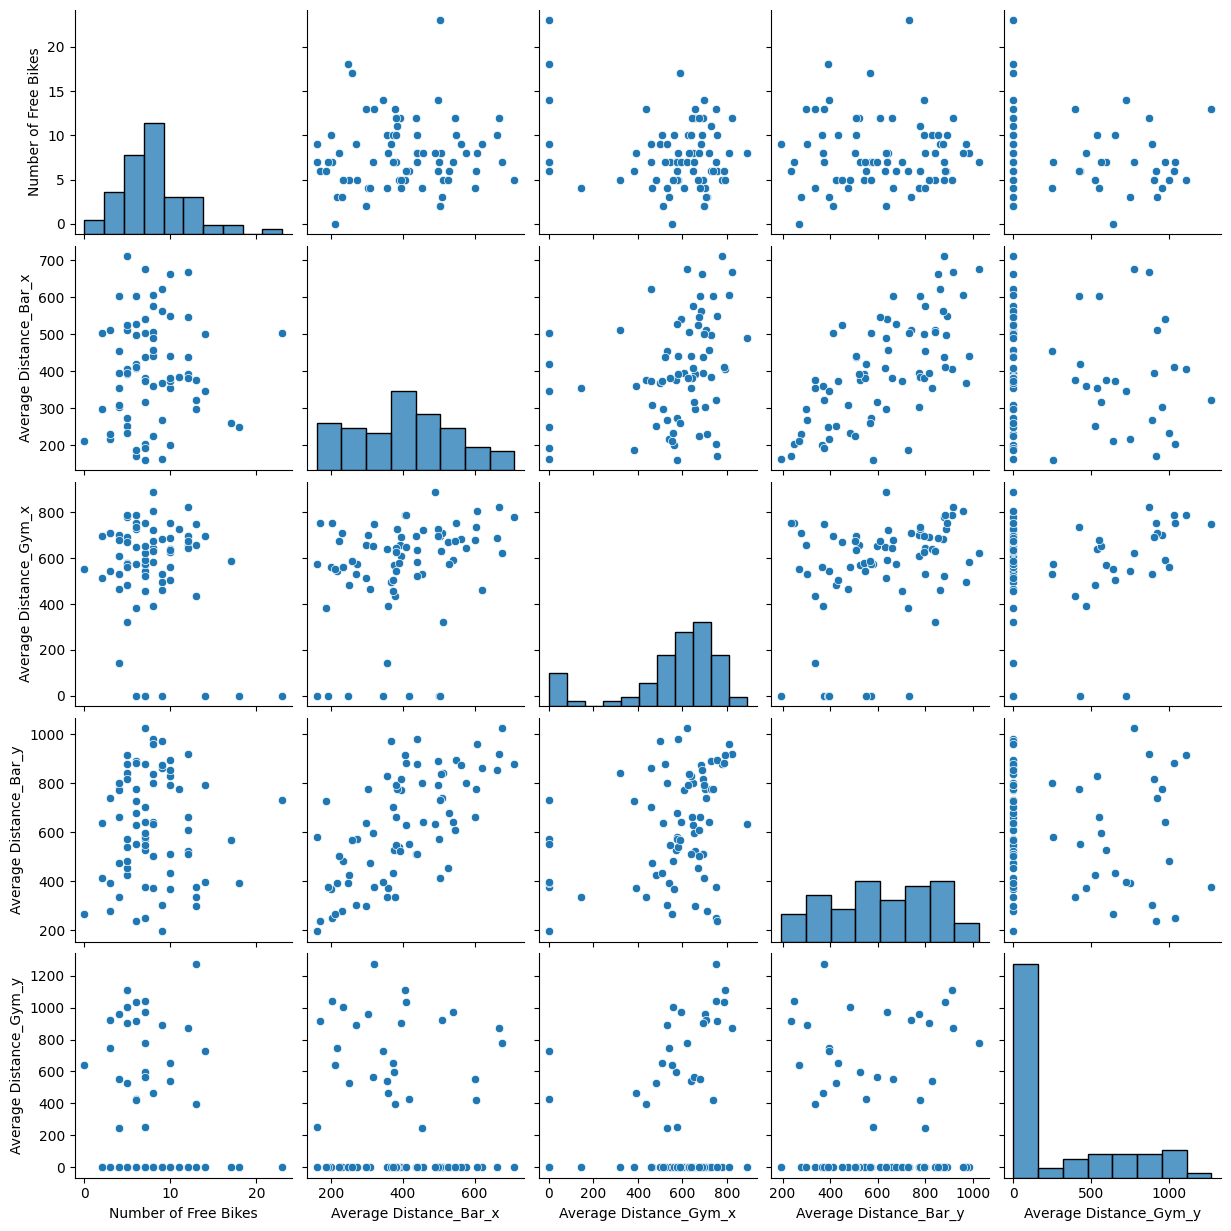

In [76]:
sns.pairplot(EDA_DF)
plt.savefig('../images/Scatterplots.png')
plt.show()

In [77]:
EDA_DF.describe()

,Number of Free Bikes,Average Distance_Bar_x,Average Distance_Gym_x,Average Distance_Bar_y,Average Distance_Gym_y
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,7.864865,401.567568,560.138798,622.024536,276.306559
std,3.890009,138.866653,219.138887,216.765226,392.493989
min,0.000000,160.000000,0.000000,194.417696,0.000000
25%,5.000000,298.750000,515.975000,437.308509,0.000000
50%,7.000000,391.250000,623.616667,631.417686,0.000000
75%,10.000000,503.825000,695.562500,800.267619,562.459916
max,23.000000,711.300000,888.666667,1025.793155,1274.454569


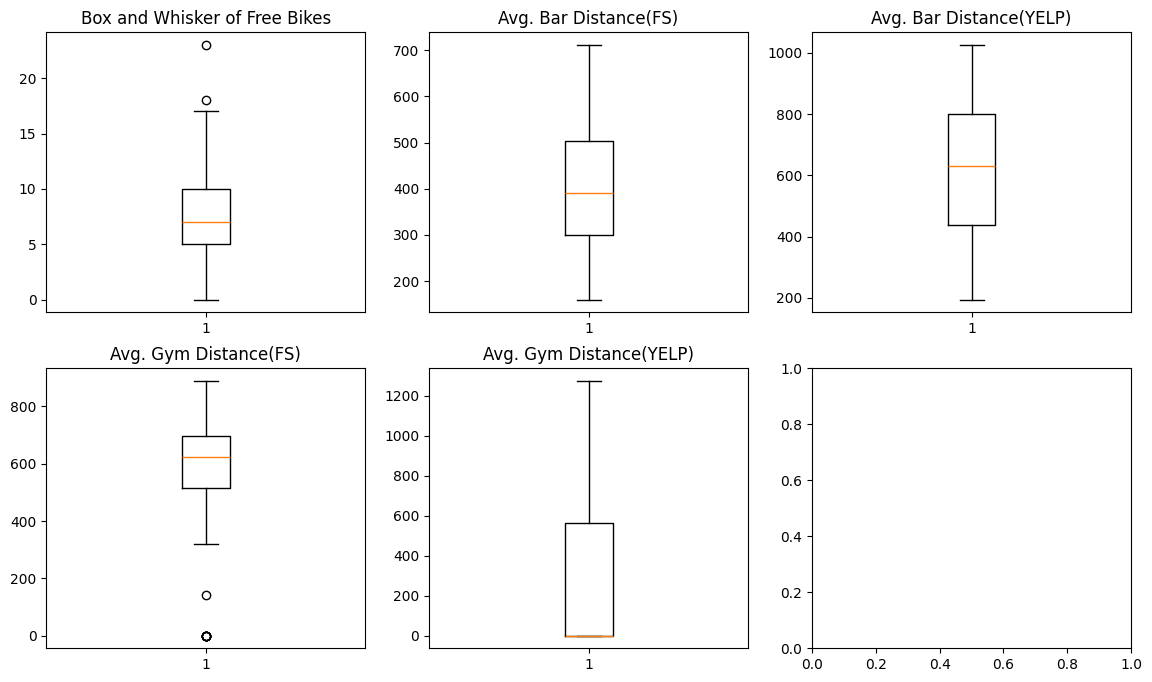

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))


axes[0][0].boxplot(EDA_DF['Number of Free Bikes'])
axes[0][0].set_title('Box and Whisker of Free Bikes')

axes[0][1].boxplot(EDA_DF['Average Distance_Bar_x'])
axes[0][1].set_title('Avg. Bar Distance(FS)')

axes[0][2].boxplot(EDA_DF['Average Distance_Bar_y'])
axes[0][2].set_title('Avg. Bar Distance(YELP)')

axes[1][0].boxplot(EDA_DF['Average Distance_Gym_x'])
axes[1][0].set_title('Avg. Gym Distance(FS)')

axes[1][1].boxplot(EDA_DF['Average Distance_Gym_y'])
axes[1][1].set_title('Avg. Gym Distance(YELP)')

plt.savefig('../images/BoxWhiskers.png')
plt.show()

In [79]:
#out of all the variables, the number of free bikes appears to have the largest correlation with avg. gym distance
CorrMatrix = EDA_DF.corr(numeric_only=True)
CorrMatrix

,Number of Free Bikes,Average Distance_Bar_x,Average Distance_Gym_x,Average Distance_Bar_y,Average Distance_Gym_y
Number of Free Bikes,1.000000,0.064568,-0.215031,0.003991,-0.168063
Average Distance_Bar_x,0.064568,1.000000,0.279307,0.670809,-0.146011
Average Distance_Gym_x,-0.215031,0.279307,1.000000,0.326278,0.181983
Average Distance_Bar_y,0.003991,0.670809,0.326278,1.000000,-0.122309
Average Distance_Gym_y,-0.168063,-0.146011,0.181983,-0.122309,1.000000


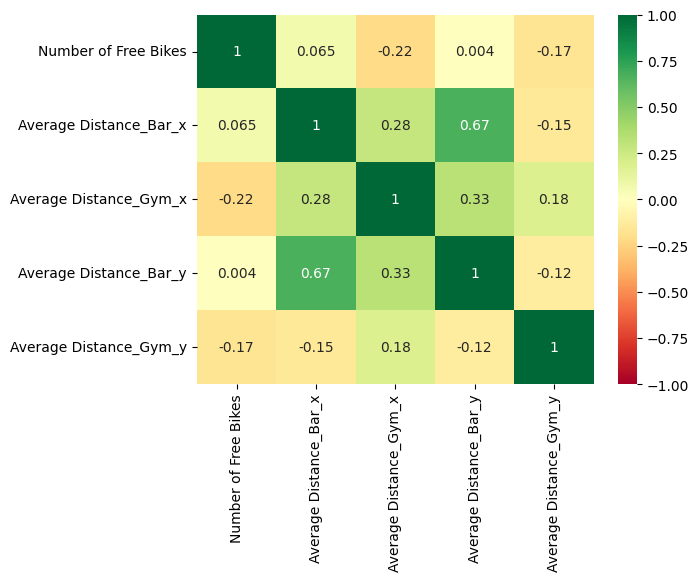

In [80]:
#Heatmap of correlation matrix
sns.heatmap(CorrMatrix, vmin=-1, vmax=1, cmap='RdYlGn', annot=True)
plt.savefig('../images/CorrHeatMap.png')
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [58]:
import sqlite3
from sqlite3 import Error

In [81]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print('Connection Successful')
    except Error as e:
        print('The error ' + e + ' occurred')

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [82]:
connection = create_connection("../data/BikeCity_.sqlite")

# Connect DataFrames to the database
BIKE_DF.to_sql('bikes', connection, if_exists='replace', index=False)
YELP_DF.to_sql('yelp', connection, if_exists='replace', index=False)
FS_DF.to_sql('foursquare', connection, if_exists='replace', index=False)


BIKE_FS_YELP_DF.to_sql('joinedDF', connection, if_exists='replace', index=False)

#close connection
connection.close()


Connection Successful


Look at the data before and after the join to validate your data.

In [67]:
"""BEFORE JOIN"""
#'Open'/reestablish connection
connection = create_connection("../data/BikeCity_.sqlite")


SELECT_bikes = "SELECT * FROM bikes"
bikes = execute_query(connection, SELECT_bikes)

for station in bikes:
    print(station)

#close connection
connection.close()

Connection Successful
('Parc Anet-Gomin', 46.786588174519565, -71.25823142456434, 5)
('Sheppard / William', 46.784040811002114, -71.24939086365126, 4)
('ExpoCité - Grand Marché', 46.8294326924675, -71.24406570853023, 4)
('Lavigueur / Sainte-Geneviève', 46.81240304152266, -71.22041093634985, 7)
('ExpoCité - Place Jean-Béliveau', 46.826552659765404, -71.24597805079398, 4)
('ULaval - Ferdinand-Vandry', 46.77853060014388, -71.27677889990233, 12)
('Cégep de Sainte-Foy', 46.786167, -71.285878, 8)
('Pente-Douce / Montmagny', 46.804262124158974, -71.23915287184141, 8)
('La Cité Verte', 46.79674647001209, -71.25180753397368, 5)
('Parc Saint-Charles-Garnier', 46.78608679238198, -71.25134619402311, 7)
('Musée national des beaux-arts', 46.8014574117429, -71.22620529593462, 7)
("Parc de l'Esplanade", 46.81083682977029, -71.21174416734335, 3)
('Père-Marquette / Belvédère', 46.7984764758592, -71.2399580535144, 9)
('Château Frontenac', 46.8113080501692, -71.20505394863508, 7)
('Parc Montmorency', 46.8

In [83]:
"""AFTER JOIN"""
# Open/reestablish connection
connection = create_connection("../data/BikeCity_.sqlite")

SELECT_bikes = "SELECT * FROM joinedDF"
bikes = execute_query(connection, SELECT_bikes)

for station in bikes:
    print(station)

#close connection
connection.close()

Connection Successful
('Parc Anet-Gomin', 46.786588174519565, -71.25823142456434, 5, '0    8.1\n1    NaN\n2    8.5\n3    7.0\n4    7.7\n5    NaN\n6    8.2\n7    8.1\n8    7.8\n9    NaN\nName: rating, dtype: float64', 711.3, 777.125, '0     4.5\n1     4.5\n2     4.5\n3     4.0\n4     4.0\n5     4.0\n6     4.5\n7     4.5\n8     4.5\n9     3.5\n10    3.5\n11    3.0\n12    3.5\n13    3.5\n14    4.0\n15    5.0\n16    4.5\n17    3.5\n18    3.5\n19    4.0\nName: rating, dtype: float64', 877.11726034077, 0.0)
('Sheppard / William', 46.784040811002114, -71.24939086365126, 4, '0    7.8\n1    8.5\n2    6.6\n3    7.7\n4    7.0\n5    8.5\n6    7.6\n7    6.8\n8    6.7\n9    6.8\nName: rating, dtype: float64', 355.2, 142.0, '0     4.5\n1     4.5\n2     4.5\n3     4.0\n4     4.0\n5     4.5\n6     4.5\n7     5.0\n8     5.0\n9     3.5\n10    3.5\n11    3.5\n12    4.0\n13    3.5\n14    5.0\n15    2.5\n16    3.5\n17    4.0\n18    4.0\n19    3.5\nName: rating, dtype: float64', 334.6887038189146, 0.0)
('Exp